In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow.keras.backend as K
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.optimize import minimize

In [2]:
path = "boston.csv"
df = pd.read_csv(path)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In this dataset we are going to predict "MEDV" label. This is the median value of house price(for 1000 dollar)

In [4]:
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
X = df.drop("PRICE", axis = 1)
y = df["PRICE"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [8]:
# Do scaling after splitting the data. Unless it will happen data leakage
scaler = StandardScaler()
scaler.fit(X_train)
# We want same distribution(std, mean etc.) for train and test data. Thus we use X_train data distribution.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Neural network model

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 578.2137 - r_squared: -6.2613 - val_loss: 441.5048 - val_r_squared: -13.0543
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 479.7113 - r_squared: -5.0823 - val_loss: 367.1950 - val_r_squared: -10.7949
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 413.9102 - r_squared: -3.9942 - val_loss: 266.8342 - val_r_squared: -7.7470
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 241.0581 - r_squared: -2.3399 - val_loss: 153.0764 - val_r_squared: -4.2297
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 144.7790 - r_squared: -0.6095 - val_loss: 73.1123 - val_r_squared: -1.4737
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.4418 - r_squared: 0.0702 - val_loss: 45.5741 - val_r_squared: -0.3330
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.7234 - r_squared: 0.4232 - val_loss: 32.5088 - val_r_squared: 0.0924
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.5946 -

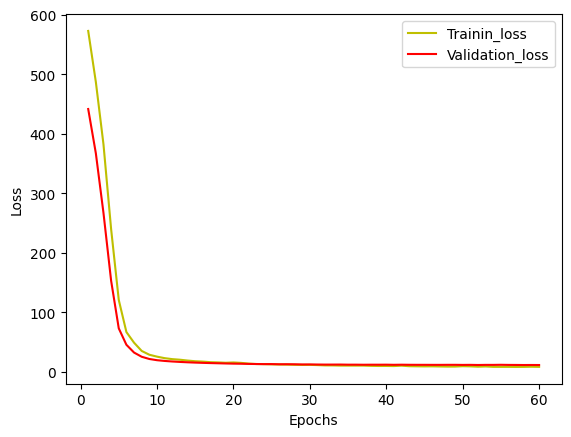

In [11]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "linear"))
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = [r_squared])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs = 60)

# Predict and flatten the output
y_pred_nn = model.predict(X_test_scaled).ravel()
# Storing nn's r^2 score
test_r2_nn = r2_score(y_test, y_pred_nn)


loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "y", label = "Trainin_loss")
plt.plot(epochs, val_loss, "r", label = "Validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Linear Regression

In [13]:
lr_model = LinearRegression().fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [14]:
test_r2_lr = r2_score(y_test, y_pred_lr)
print("Test set r^2 score is:", test_r2_lr)

Test set r^2 score is: 0.7438826183113534


# Decision Tree

In [16]:
dt_model = DecisionTreeRegressor().fit(X_train_scaled, y_train)

In [17]:
y_pred_dt = dt_model.predict(X_test_scaled)
test_r2_dt = r2_score(y_test, y_pred_dt)
print("Test set r^2 score is:", test_r2_dt)

Test set r^2 score is: 0.7237323742832827


# Random Forest

In [19]:
rf_model =  RandomForestRegressor(n_estimators = 30, random_state = 30).fit(X_train_scaled, y_train)

In [20]:
y_pred_rf = rf_model.predict(X_test_scaled)
test_r2_rf = r2_score(y_test, y_pred_rf)
print("Test set r^2 score is:", test_r2_rf)

Test set r^2 score is: 0.8027945260646793


Random forest gives the best score for this dataset. And the other good thing is random forest is interpretable.

In [22]:
feature_list = list(X.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

LSTAT      0.478879
RM         0.338097
DIS        0.063072
CRIM       0.038339
NOX        0.019377
PTRATIO    0.014499
B          0.013671
TAX        0.013144
AGE        0.010595
INDUS      0.004749
RAD        0.003753
ZN         0.001460
CHAS       0.000364
dtype: float64


  LSTAT and RM features are biggest decision makers. And random forest algorithm interpret this efficiently.

# Weighted Ensemble

## Weight tuning for weighted ensemble model

In [26]:
# Stack the predictions
predictions = np.column_stack((y_pred_nn, y_pred_lr, y_pred_dt, y_pred_rf))

# Define the loss function (MSE)
def mse_loss(weights, predictions, y_test):
    weighted_preds = np.dot(predictions, weights)
    return mean_squared_error(y_test, weighted_preds)

# Initial weights
initial_weights = np.array([0.25, 0.25, 0.25, 0.25])

# Constraints: the sum of the weights should be 1
constraints = ({'type': 'eq', 'fun': lambda w: 1 - sum(w)})

# Bounds: the weights should be between 0 and 1
bounds = [(0, 1)] * 4  # Four bounds, one for each model

# Optimization to minimize MSE
opt_result = minimize(mse_loss, initial_weights, args=(predictions, y_test), 
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = opt_result.x
print("Optimal Weights:", optimal_weights)

Optimal Weights: [0.34004212 0.17395816 0.11849692 0.3675028 ]


The output found gave us the optimum weights of neural networks, linear regression, decision tree and random forest algorithms, respectively. If you look carefully, the sizes of these weights are directly proportional to the performance of the models on the y_test set.

## Making prediction and evaluation

In [29]:
weighted_ens_preds = np.dot(predictions, optimal_weights)

In [30]:
test_r2_weighted_ens = r2_score(y_test, weighted_ens_preds)
print("Test set r^2 score is:", test_r2_weighted_ens)

Test set r^2 score is: 0.8267033968640473


# Comparing different learning algorithms and weighted ensemble model based on r^2 score 

In [32]:
print(f"{'Model':<25}{'R-squared Value':<15}")
print("="*40)
print(f"{'Neural Network (NN)':<25}{test_r2_nn:<15.4f}")
print(f"{'Linear Regression (LR)':<25}{test_r2_lr:<15.4f}")
print(f"{'Decision Tree (DT)':<25}{test_r2_dt:<15.4f}")
print(f"{'Random Forest (RF)':<25}{test_r2_rf:<15.4f}")
print(f"{'Weighted Ensemble':<25}{test_r2_weighted_ens:<15.4f}")

Model                    R-squared Value
Neural Network (NN)      0.7875         
Linear Regression (LR)   0.7439         
Decision Tree (DT)       0.7237         
Random Forest (RF)       0.8028         
Weighted Ensemble        0.8267         
